In [32]:
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
from torchvision import transforms as T
import torch.nn.functional as F
from torch.optim import SGD, Adam
from torch import nn
import torch
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import tarfile
from torchvision.datasets.utils import download_url
import numpy as np
from imagenette_ds import load_imagenette
from resblock import ResBlock
from SEBlock import SE_Block
from model_learning import Training_valid_testing_model

In [17]:
train_loader, val_loader, test_loader, test_dataset = load_imagenette()

In [3]:
device = "cuda:2" if torch.cuda.is_available() else "cpu"

In [4]:
class Resnet34_body(nn.Module):
    def __init__(self):
        super().__init__()
        
        convblocks2 = nn.ModuleList([ResBlock(in_channels=64, out_channels=64) for i in range(3)])
        self.convblock2_n = nn.Sequential(*convblocks2)
        
        self.convblock3_1 = ResBlock(in_channels=64, out_channels=128, downsample=True)
        convblocks3 = nn.ModuleList([ResBlock(in_channels=128, out_channels=128) for i in range(3)])
        self.convblock3_n = nn.Sequential(*convblocks3)

        self.convblock4_1 = ResBlock(in_channels=128, out_channels=256, downsample=True)
        convblocks4 = nn.ModuleList([ResBlock(in_channels=256, out_channels=256) for i in range(5)])
        self.convblock4_n = nn.Sequential(*convblocks4)

        self.convblock5_1 = ResBlock(in_channels=256, out_channels=512, downsample=True)
        convblocks5 = nn.ModuleList([ResBlock(in_channels=512, out_channels=512) for i in range(2)])
        self.convblock5_n = nn.Sequential(*convblocks5)
        
        
    def forward(self, x):
        
        x = self.convblock2_n(x)
        
        x = self.convblock3_1(x)
        x = self.convblock3_n(x)
        
        x = self.convblock4_1(x)
        x = self.convblock4_n(x)
        
        x = self.convblock5_1(x)
        x = self.convblock5_n(x)
        
        return x

        
class ResNet34(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
                                     Resnet34_body(),
                                     nn.AdaptiveAvgPool2d(1),
                                     nn.Flatten(),
                                     nn.Linear(512, 10))
        
    def forward(self, x):
        x = self.network(x)
        
        return x

In [24]:
model = ResNet34()
model = model.to(device)
num_epochs = 35
learning_rate = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(params=model.parameters(), lr=learning_rate)

In [33]:
model_learning = Training_valid_testing_model(model=model, loss_function=loss_function,
                                              optimizer=optimizer, num_epochs=num_epochs, train_loader=train_loader,
                                              val_loader=val_loader, test_loader=test_loader, test_dataset=test_dataset,
                                              device=device)

Epoch number is 1


592it [01:00,  9.73it/s]
183it [00:11, 15.79it/s]


CrossEntropyLoss train 2.0216763933768145
CrossEntropyLoss validation 3.063478202767711
Validation accuracy: 13.675213675213675
Epoch number is 2


592it [00:59, 10.03it/s]
183it [00:11, 15.85it/s]


CrossEntropyLoss train 1.7384810600731824
CrossEntropyLoss validation 1.648311087016851
Validation accuracy: 44.547008547008545
Epoch number is 3


592it [00:58, 10.07it/s]
183it [00:11, 15.74it/s]


CrossEntropyLoss train 1.5623927236207433
CrossEntropyLoss validation 1.3993272328637336
Validation accuracy: 52.41025641025641
Epoch number is 4


592it [00:58, 10.08it/s]
183it [00:11, 15.77it/s]


CrossEntropyLoss train 1.3472039360250976
CrossEntropyLoss validation 1.5332391087800428
Validation accuracy: 54.22222222222222
Epoch number is 5


592it [00:58, 10.15it/s]
183it [00:11, 15.84it/s]


CrossEntropyLoss train 1.2102318256590012
CrossEntropyLoss validation 1.4927605488261237
Validation accuracy: 53.05982905982906
Epoch number is 6


592it [00:58, 10.06it/s]
183it [00:11, 15.90it/s]


CrossEntropyLoss train 1.1065919292033524
CrossEntropyLoss validation 1.2340555062385206
Validation accuracy: 61.12820512820513
Epoch number is 7


592it [00:59,  9.91it/s]
183it [00:11, 15.68it/s]


CrossEntropyLoss train 1.0480759091977332
CrossEntropyLoss validation 1.0745493570963542
Validation accuracy: 66.2905982905983
Epoch number is 8


592it [00:59, 10.02it/s]
183it [00:11, 15.63it/s]


CrossEntropyLoss train 0.9542090725657102
CrossEntropyLoss validation 0.9431488451247658
Validation accuracy: 70.66666666666667
Epoch number is 9


592it [00:59, 10.02it/s]
183it [00:10, 18.08it/s]


CrossEntropyLoss train 0.9074664793505862
CrossEntropyLoss validation 0.9674142607248546
Validation accuracy: 69.05982905982906
Epoch number is 10


592it [00:57, 10.26it/s]
183it [00:10, 16.67it/s]


CrossEntropyLoss train 0.842670809200688
CrossEntropyLoss validation 1.2900728679419866
Validation accuracy: 60.27350427350427
Epoch number is 11


592it [00:56, 10.49it/s]
183it [00:10, 16.76it/s]


CrossEntropyLoss train 0.7985720708462838
CrossEntropyLoss validation 0.8727443393299489
Validation accuracy: 71.82905982905983
Epoch number is 12


592it [00:56, 10.48it/s]
183it [00:09, 18.51it/s]


CrossEntropyLoss train 0.7673542013995953
CrossEntropyLoss validation 0.8109403476526177
Validation accuracy: 74.66666666666667
Epoch number is 13


592it [00:55, 10.64it/s]
183it [00:09, 18.61it/s]


CrossEntropyLoss train 0.7053665999776205
CrossEntropyLoss validation 0.8403573534527763
Validation accuracy: 73.64102564102564
Epoch number is 14


592it [00:54, 10.77it/s]
183it [00:09, 18.77it/s]


CrossEntropyLoss train 0.6834844992168851
CrossEntropyLoss validation 0.8453581350260093
Validation accuracy: 73.53846153846153
Epoch number is 15


592it [00:59, 10.03it/s]
183it [00:11, 15.81it/s]


CrossEntropyLoss train 0.6472806766805416
CrossEntropyLoss validation 0.7578871553061438
Validation accuracy: 76.54700854700855
Epoch number is 16


592it [00:56, 10.55it/s]
183it [00:09, 18.73it/s]


CrossEntropyLoss train 0.6182661617703333
CrossEntropyLoss validation 0.7301331264236586
Validation accuracy: 77.53846153846153
Epoch number is 17


592it [00:55, 10.64it/s]
183it [00:10, 18.30it/s]


CrossEntropyLoss train 0.5713032482670167
CrossEntropyLoss validation 0.6892933874019508
Validation accuracy: 77.98290598290598
Epoch number is 18


592it [00:55, 10.68it/s]
183it [00:09, 19.56it/s]


CrossEntropyLoss train 0.5542971368287564
CrossEntropyLoss validation 0.766146082247867
Validation accuracy: 76.68376068376068
Epoch number is 19


592it [00:55, 10.57it/s]
183it [00:09, 18.71it/s]


CrossEntropyLoss train 0.5286483122161716
CrossEntropyLoss validation 0.7693875354251575
Validation accuracy: 76.75213675213675
Epoch number is 20


592it [00:54, 10.87it/s]
183it [00:09, 18.66it/s]


CrossEntropyLoss train 0.486009786522167
CrossEntropyLoss validation 0.6983166805219129
Validation accuracy: 78.66666666666667
Epoch number is 21


592it [00:55, 10.64it/s]
183it [00:09, 18.71it/s]


CrossEntropyLoss train 0.45243080835034316
CrossEntropyLoss validation 0.8163468740839775
Validation accuracy: 77.2991452991453
Epoch number is 22


592it [00:55, 10.67it/s]
183it [00:09, 18.83it/s]


CrossEntropyLoss train 0.443252530754418
CrossEntropyLoss validation 0.7569210917531141
Validation accuracy: 77.88034188034187
Epoch number is 23


592it [00:56, 10.52it/s]
183it [00:09, 18.66it/s]


CrossEntropyLoss train 0.4108997567657482
CrossEntropyLoss validation 0.7967941507778532
Validation accuracy: 78.76923076923077
Epoch number is 24


592it [00:55, 10.72it/s]
183it [00:11, 15.28it/s]


CrossEntropyLoss train 0.39168650845090885
CrossEntropyLoss validation 0.8394266776536983
Validation accuracy: 76.82051282051282
Epoch number is 25


592it [01:00,  9.84it/s]
183it [00:11, 15.30it/s]


CrossEntropyLoss train 0.3775724517118588
CrossEntropyLoss validation 0.9236287248264896
Validation accuracy: 74.66666666666667
Epoch number is 26


592it [00:58, 10.10it/s]
183it [00:11, 15.32it/s]


CrossEntropyLoss train 0.36319240559414784
CrossEntropyLoss validation 0.8923470953815296
Validation accuracy: 75.41880341880342
Epoch number is 27


592it [00:56, 10.51it/s]
183it [00:09, 18.44it/s]


CrossEntropyLoss train 0.3437651574573907
CrossEntropyLoss validation 0.8877231262094988
Validation accuracy: 76.58119658119658
Epoch number is 28


592it [00:55, 10.74it/s]
183it [00:09, 18.73it/s]


CrossEntropyLoss train 0.32838095288182534
CrossEntropyLoss validation 0.7911288682880298
Validation accuracy: 79.52136752136752
Epoch number is 29


592it [00:52, 11.18it/s]
183it [00:09, 18.69it/s]


CrossEntropyLoss train 0.3033440076491191
CrossEntropyLoss validation 0.7590276088382377
Validation accuracy: 79.65811965811966
Epoch number is 30


592it [00:55, 10.58it/s]
183it [00:09, 18.47it/s]


CrossEntropyLoss train 0.29211376100696773
CrossEntropyLoss validation 0.7386035626662559
Validation accuracy: 80.23931623931624
Epoch number is 31


592it [00:56, 10.46it/s]
183it [00:12, 15.16it/s]


CrossEntropyLoss train 0.273393425217364
CrossEntropyLoss validation 0.9153832279634281
Validation accuracy: 77.33333333333333
Epoch number is 32


592it [01:01,  9.66it/s]
183it [00:11, 15.31it/s]


CrossEntropyLoss train 0.2461723266861628
CrossEntropyLoss validation 0.8345802796831547
Validation accuracy: 79.11111111111111
Epoch number is 33


592it [00:57, 10.29it/s]
183it [00:10, 17.90it/s]


CrossEntropyLoss train 0.24441128531219186
CrossEntropyLoss validation 0.941322178503529
Validation accuracy: 75.55555555555556
Epoch number is 34


592it [01:00,  9.75it/s]
183it [00:10, 17.19it/s]


CrossEntropyLoss train 0.24431806779151932
CrossEntropyLoss validation 0.776960371988393
Validation accuracy: 79.7948717948718
Epoch number is 35


592it [00:59, 10.00it/s]
183it [00:11, 15.52it/s]


CrossEntropyLoss train 0.22260654122077836
CrossEntropyLoss validation 1.0221423825116758
Validation accuracy: 75.45299145299145


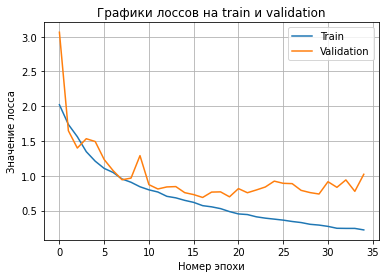

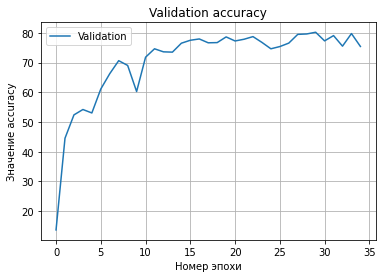

In [7]:
model_learning.learning_run()

In [8]:
model_path = 'resnet34_model_imagenette320'
torch.save(model.state_dict(), model_path)

In [29]:
test_accuracy = model_learning.testing_results()
print('Test accuracy:', test_accuracy)

Test accuracy: None


In [41]:
# model_learning.predict_image(test_dataset[5][0])

In [42]:
# model_learning.predict_image(test_dataset[600][0])